Original map


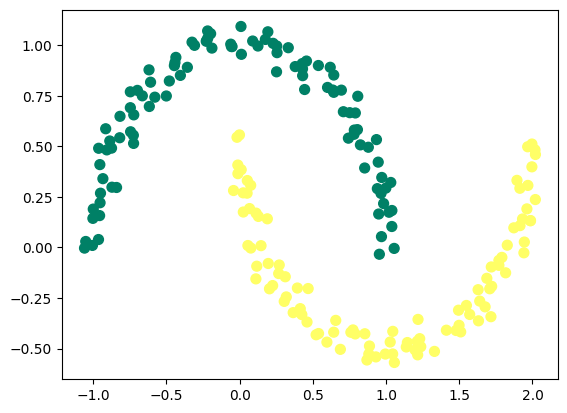

New map (colors = clusters)


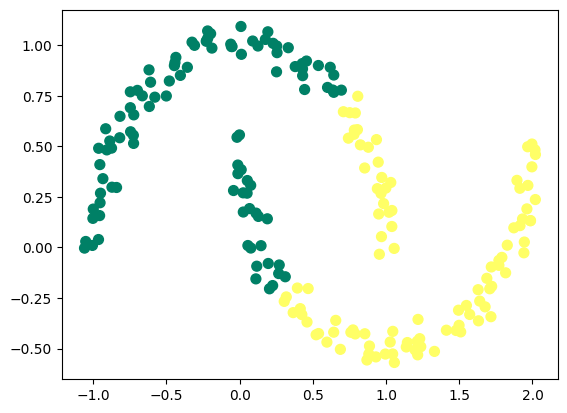

Original map


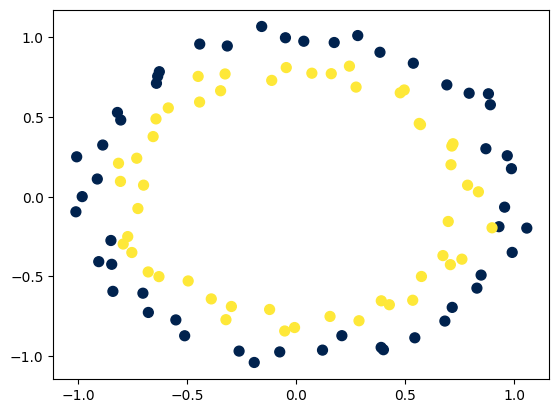

New map


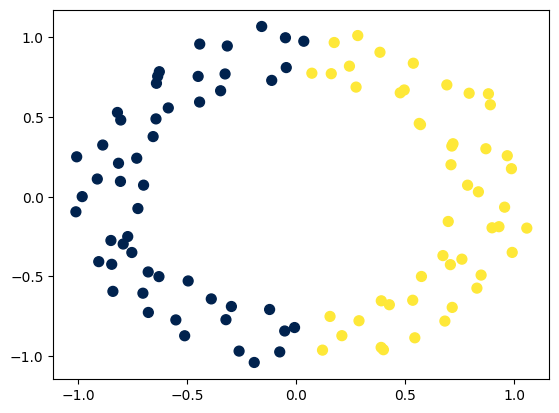

Original map


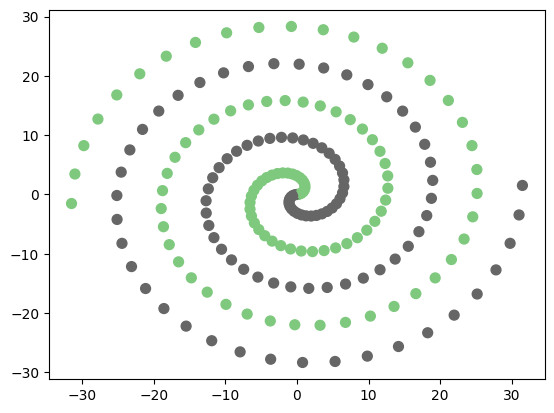

New map


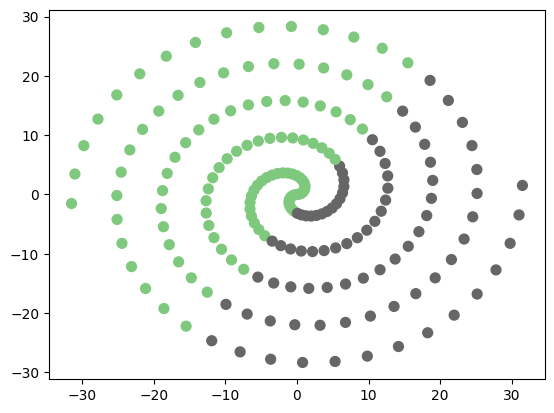

In [100]:
#################### PROBLEM #1 ##########################

#imports
from sklearn.datasets import make_moons;
from sklearn.cluster import KMeans;
from sklearn.datasets import make_circles;
import matplotlib.pyplot as plot;
import math;
import numpy as np;

#global variables
seed = 1880333;

def main():
  #make the moon clusters
  x, y = make_moons(200, noise = 0.05, random_state = seed);
  kmeansMoons = KMeans(n_clusters = 2, random_state = seed).fit_predict(x);
  print("Original map");
  plot.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='summer');
  plot.show();
  plot.cla();
  print("New map (colors = clusters)");
  plot.scatter(x[:, 0], x[:, 1], c=kmeansMoons, s=50, cmap='summer');
  plot.show();
  plot.cla();

  #make the first complicated cluster
  print("Original map");
  x1, y1 = make_circles(noise = 0.05, random_state = seed);
  plot.scatter(x1[:, 0], x1[:, 1], c=y1, s=50, cmap='cividis'); #straight up just the colors of the US Navy
  plot.show();
  plot.cla();
  kmeansCircles = KMeans(n_clusters = 2, init = np.array([[-0.5, -0.5], [1, -0.5]]), random_state = seed).fit_predict(x1);
  print("New map");
  plot.scatter(x1[:, 0], x1[:, 1], c=kmeansCircles, s=50, cmap="cividis");
  plot.show();
  plot.cla();

  #make the second complicated cluster
  print("Original map");
  x2, y2 = makeSpirals(100);
  plot.scatter([i[0] for i in x2], [i[1] for i in x2], c=y2, s=50, cmap="Accent");
  plot.show();
  plot.cla();
  kmeansSpirals = KMeans(n_clusters = 2, init = np.array([[-30, 0], [30, 0]]), random_state = seed).fit_predict(x2);
  print("New map");
  plot.scatter([i[0] for i in x2], [i[1] for i in x2], c=kmeansSpirals, s=50, cmap="Accent");

def makeSpirals(numPoints):
  x = [];
  y = [];
  for i in range(numPoints):
    t = i/(2*math.pi);
    #add to the first helix
    x.append([2*t*math.cos(t), 2*t*math.sin(t)]);
    y.append([0]);
    #add to the second helix
    x.append([2*t*math.cos(t+math.pi), 2*t*math.sin(t+math.pi)]);
    y.append([1]);

  return x, y;

if __name__ == "__main__":
  main();

Original map


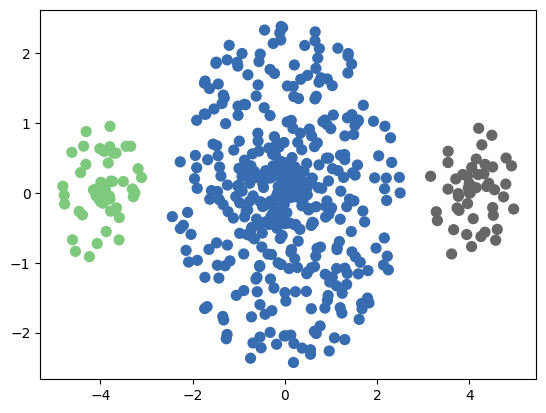

New map


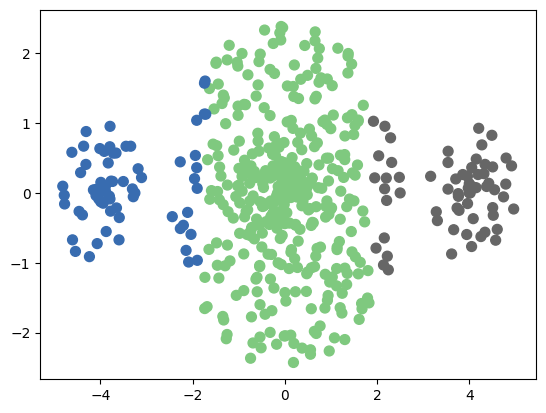

In [114]:
########################### Problem #2 ############################
#imports
from sklearn.cluster import KMeans;
import matplotlib.pyplot as plot;
import random;
import math;
import numpy as np;

#global variables
seed = 1880333;

def main():
  #make the second complicated cluster
  print("Original map");
  x2, y2 = makeUniqueBlobs(400, 50);
  plot.scatter([i[0] for i in x2], [i[1] for i in x2], c=y2, s=50, cmap="Accent");
  plot.show();
  plot.cla();
  kmeansSpirals = KMeans(n_clusters = 3, init = np.array([[0.5, 0.5], [-7, 2], [7,-2]]), random_state = seed).fit_predict(x2);
  print("New map");
  plot.scatter([i[0] for i in x2], [i[1] for i in x2], c=kmeansSpirals, s=50, cmap="Accent");

def makeUniqueBlobs(numPointsBig, numPointsSmall):
  centers = [-4, 0, 4];
  random.seed(1880333);
  x = [];
  y = [];
  for i in range(numPointsSmall):
    r = random.random();
    t = i/(2*math.pi);
    #add to the first circle
    x.append([r*math.cos(t)+centers[0], r*math.sin(t)]);
    y.append([0]);

    #add to the second circle
    r = random.random();
    x.append([r*math.cos(t) + centers[2], r*math.sin(t)]);
    y.append([2]);

  for i in range(numPointsBig):
    r = random.random() * 2.5;
    t = i/(2*math.pi);
    #add to the middle circle
    x.append([r*math.cos(t) + centers[1], r*math.sin(t)]);
    y.append([1]);
  return x, y;

  return x, y;

if __name__ == "__main__":
  main();